**Import** **Libraries**

In [1]:
#Importing the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the Data (Data Gathering)**

In [2]:
#Reading the Mall Customers data set
df=pd.read_csv("Mall_Customers.csv")
print('The first 5 rows of the data frame is: ')
print(df.head())

The first 5 rows of the data frame is: 
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Data Analysing**

In [3]:
#Checking the dimension of the data set
print('The no.of rows and no.of columns of the data frame is:',df.shape)

The no.of rows and no.of columns of the data frame is: (200, 5)


In [4]:
#Calculating the mathematical operayions in the columns of the data set
print('The calculations on the columns of the data frame: ')
print(df.describe())

The calculations on the columns of the data frame: 
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [5]:
#Checking the data types of each column
print('The data types of the columns: ')
print(df.dtypes)

The data types of the columns: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


**Data Cleaning**

In [6]:
#Checking if there are any null values in the data set
print('The no. of Null values in the data frame of each column:')
print(df.isnull().sum())

The no. of Null values in the data frame of each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Data Visualizing**

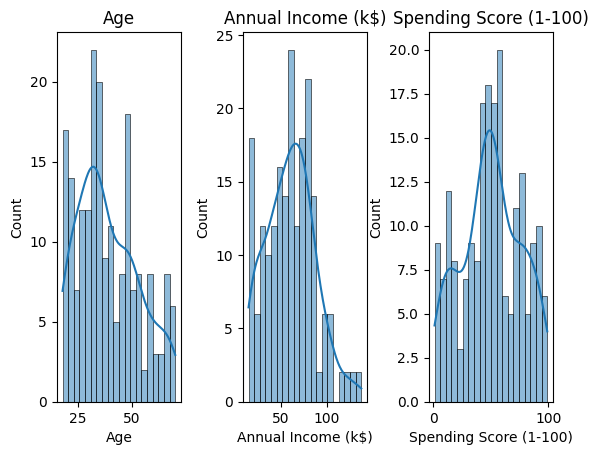

In [7]:
#Visualizing the count of the customers according to their Age, Annual Income(k$), Spending Score(1-100)
n=0
for i in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.histplot(df[i],bins=20,kde=True)
  plt.title(i)
plt.show()

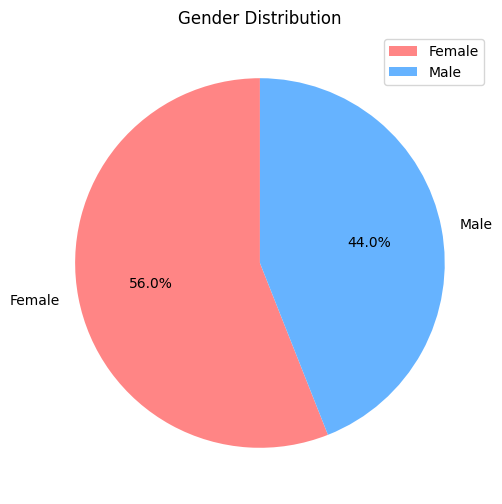

In [8]:
#Pie Chart of Gender Distribution of visited customers
gender_column = df['Gender']
gender_counts = gender_column.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, startangle=90, autopct='%.1f%%', colors=['#ff8585', '#66b3ff'])
plt.title('Gender Distribution')
plt.legend()
plt.show()

**Building the Model**

1. Clustering the customers by their Age and Spending Score

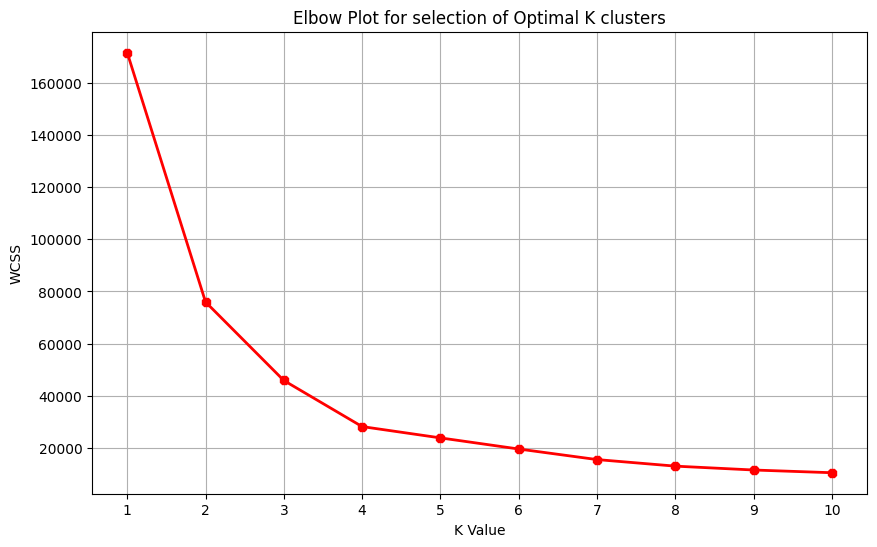

In [9]:
x1=df.iloc[:,[2,4]].values # Taking columns Age and Spending Score (1-100)
from sklearn.cluster import KMeans
wcss=[] #WCSS is the sum of the squared distance between each point and the centroid in a cluster
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++",n_init=10)
  kmeans.fit(x1)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Plot for selection of Optimal K clusters")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [10]:
# From the Above graph the optimal K value is 4
kmeans=KMeans(n_clusters=4,n_init=10)
label=kmeans.fit_predict(x1) # It tells which customer belongs to which cluster
print(label)

[3 2 0 2 3 2 0 2 0 2 0 2 0 2 0 2 3 3 0 2 3 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0
 2 0 2 1 2 1 3 0 3 1 3 3 3 1 3 3 1 1 1 1 1 3 1 1 3 1 1 1 3 1 1 3 3 1 1 1 1
 1 3 1 3 3 1 1 3 1 1 3 1 1 3 3 1 1 3 1 3 3 3 1 3 1 3 3 1 1 3 1 3 1 1 1 1 1
 3 3 3 3 3 1 1 1 1 3 3 3 2 3 2 1 2 0 2 0 2 3 2 0 2 0 2 0 2 0 2 3 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 2 0 2 0 2 3
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


In [11]:
#Printing  the cluster centroids
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]]


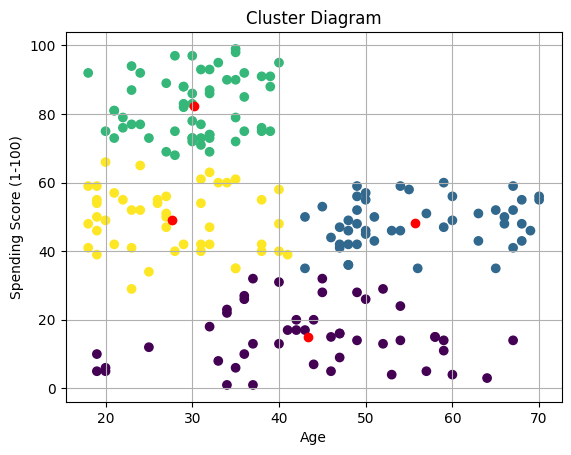

In [12]:
#Cluster Diagram between Age and Spending Score (1-100)
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red') # The red dots represents the particluar cluster's centroid
plt.grid()
plt.title('Cluster Diagram')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

2. Clustering the customers by their Annual Income and Spending Score

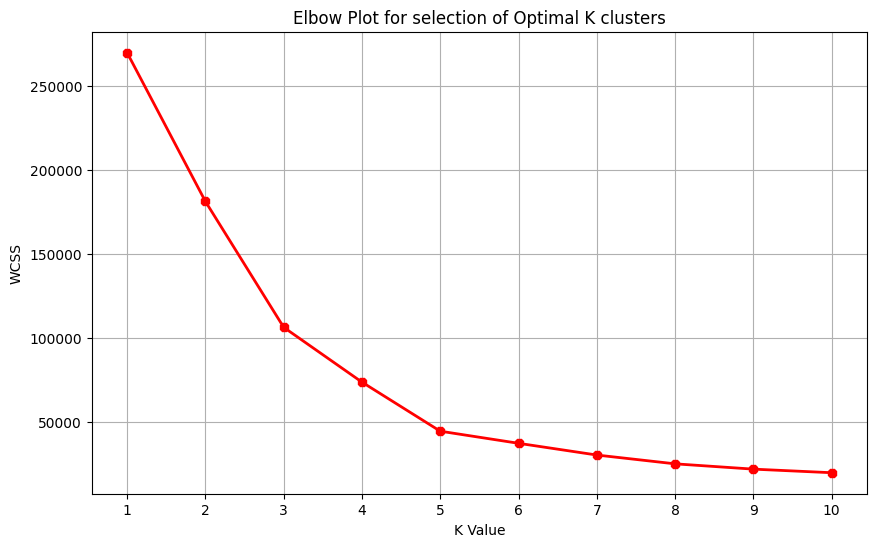

In [13]:
x2=df.iloc[:,[3,4]].values # Taking the columns Annual Income (k$) and Spending Score(1-100)
from sklearn.cluster import KMeans
wcss=[] #WCSS is the sum of the squared distance between each point and the centroid in a cluster
for k in range(1,11):
  kmeans=KMeans(n_clusters=k, init="k-means++",n_init=10)
  kmeans.fit(x2)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color='red', marker='8')
plt.xticks(np.arange(1,11,1))
plt.title("Elbow Plot for selection of Optimal K clusters")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [14]:
# From the above graph the optimal K value is 5
kmeans=KMeans(n_clusters=5,n_init=10)
label=kmeans.fit_predict(x2) # It tells which customer belongs to which cluster
print(label)

[2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 4 2 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 3 1 3 4 3 1 3 1 3 4 3 1 3 1 3 1 3 1 3 4 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [15]:
#Printing the cluster centroids
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]]


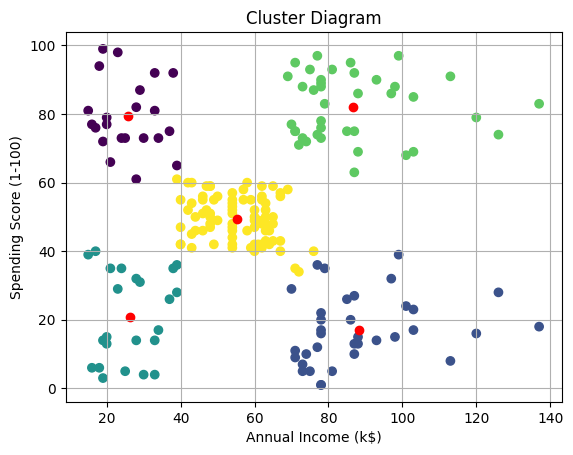

In [16]:
#Cluster Diagram between Age and Spending Score (1-100)
plt.scatter(x2[:,0],x2[:,1],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='red') # The Red dots represent the particluar cluster's centroid
plt.grid()
plt.title('Cluster Diagram')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()